In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style("white")
fig_w = 2530
fig_h = 1900
my_dpi=200

plt.style.use('ggplot')

from matplotlib import rcParams
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.rc('font', family='BabelStone Han', size=13) # 选择你自己电脑上的字体

In [2]:
%%bash
ls '../../../OneDrive - University of New Mexico/data/mybilividdata'

total.csv
vid_data_10000000_12000000.csv
vid_data_12000000_14000000.csv
vid_data_14000000_16000000.csv
vid_data_16000000_18000000.csv
vid_data_18000000_20000000.csv
vid_data_1_2000000.csv
vid_data_20000000_22000000.csv
vid_data_2000000_4000000.csv
vid_data_22000000_24000000.csv
vid_data_4000000_6000000.csv
vid_data_6000000_8000000.csv
vid_data_8000000_10000000.csv


In [3]:
path = '../../../OneDrive - University of New Mexico/data/mybilividdata/'
file_list = [ 'vid_data_1_2000000.csv', 'vid_data_2000000_4000000.csv', 'vid_data_4000000_6000000.csv', 'vid_data_6000000_8000000.csv', 'vid_data_8000000_10000000.csv', 'vid_data_10000000_12000000.csv', 'vid_data_12000000_14000000.csv', 'vid_data_14000000_16000000.csv', 'vid_data_16000000_18000000.csv', 'vid_data_18000000_20000000.csv', 'vid_data_20000000_22000000.csv', 'vid_data_22000000_24000000.csv' ]

In [4]:
df = pd.read_csv( path + file_list[0] )

In [5]:
for file in file_list[1:]:
    df = df.append( pd.read_csv( path + file ) )

In [6]:
df.head()

,aid,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like
0,100,177334,3053,3315,3390,1422,199,0,27,854
1,12,600584,4966,4443,5886,665,673,0,0,637
2,16,189589,2082,3361,1870,242,263,0,0,603
3,2,-1,14272,20183,7036,2780,2198,0,0,3235
4,20,215804,5863,3232,5719,685,288,0,0,570


In [7]:
df.tail()

,aid,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like
1083868,23323651,9,0,1,2,0,0,0,0,1
1083869,23323686,1,0,0,0,0,0,0,0,0
1083870,23323691,1,0,0,0,0,0,0,0,0
1083871,23323744,1,0,0,0,0,0,0,0,2
1083872,23323833,1,0,2,2,0,0,0,0,1


In [8]:
len(df)

15920858

In [9]:
df.to_csv(path + 'total.csv', sep=',', encoding='utf-8')

## Missing Video Rate

In [10]:
vid_ids = df['aid'].values

In [11]:
windowsize = 100000

missing_rate_list = []
missing_rate_list_vid = []

missing_data_start = 0
missing_data_flag = missing_data_start
missing_data_end = max(vid_ids)

for i in np.arange(missing_data_start, missing_data_end - windowsize, windowsize ):
    
    missing_rate_list.append( len( df[ (df['aid'] > i) & (df['aid'] < i+ windowsize) ] )/windowsize )
    missing_rate_list_vid.append( i )
    

In [12]:
from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

missing_rate_list_fig_start = 30
A,B = curve_fit(f, missing_rate_list_vid[missing_rate_list_fig_start:], missing_rate_list[missing_rate_list_fig_start:] )[0] # your data x, y to fit
print(missing_rate_list_vid[missing_rate_list_fig_start], '\n', missing_rate_list_vid[missing_rate_list_fig_start]+windowsize)
missing_rate_list_fit = [A * i + B for i in missing_rate_list_vid]

3000000 
 3100000


In [13]:
print( datetime.datetime.fromtimestamp(1443881398) )
print( datetime.datetime.fromtimestamp(1394268177) )

2015-10-03 08:09:58
2014-03-08 01:42:57


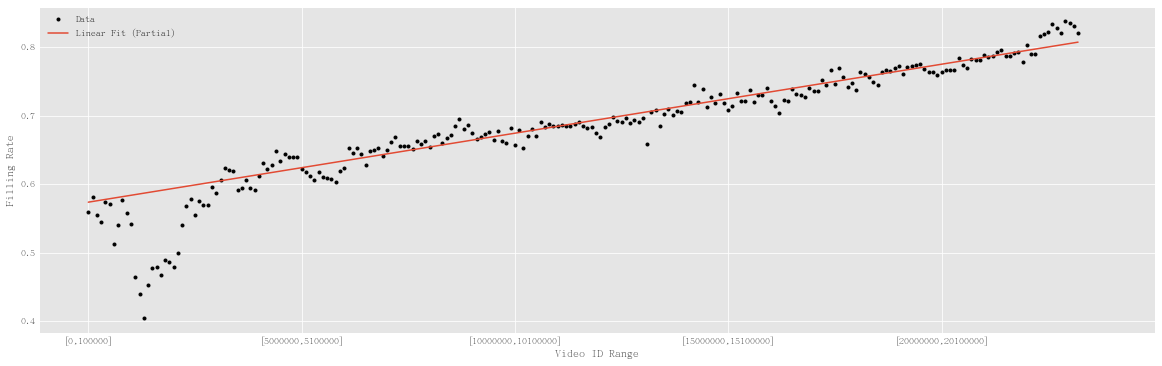

In [14]:
plt.figure(figsize=(20,6))
plt.plot( missing_rate_list_vid, missing_rate_list, 'k.', label='Data')
plt.plot( missing_rate_list_vid, missing_rate_list_fit, label='Linear Fit (Partial)')
plt.ylabel('Filling Rate')
plt.xlabel('Video ID Range')
locs, labels = plt.xticks()
tick_labels = ( '['+str('{}'.format( int(i))) + ',' + str('{}'.format( int(i+windowsize) )) + ']' for i in list(locs[1:]) )
tick_labels = [''] + list(tick_labels)
tick_labels[-1] = ''
plt.xticks(locs[1:], tick_labels[1:] )
plt.legend()
plt.show()

In [15]:
view_hist_data = np.histogram( df['view'].values/100, bins=np.arange(1,10000,100))

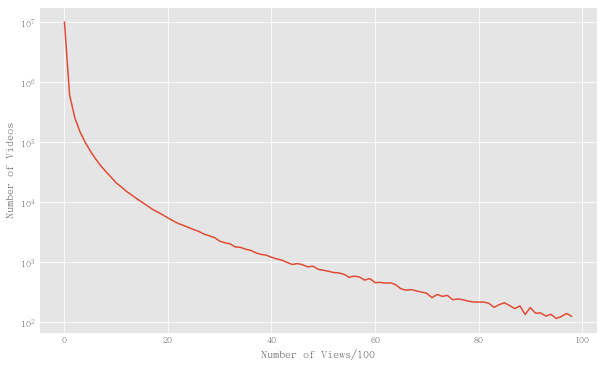

In [16]:
plt.figure(figsize=(10,6))
plt.semilogy( view_hist_data[0] )
plt.ylabel('Number of Videos')
plt.xlabel('Number of Views/100')
plt.show()